# Worksheet 15

Name:  Jiahang Li
UID: U00295086

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

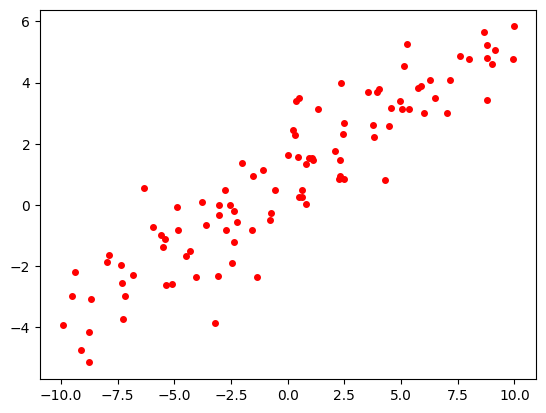

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the line equation
line = np.array([1, 0.5])


xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

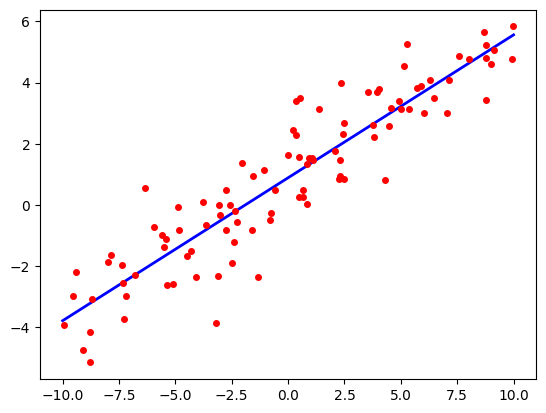

In [2]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(ylin)

xplot = np.linspace(-10,10,50)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimate of beta obtained from the least squares regression line may not be exactly the same as the parameters used to generate the data. However, it should be close to the true parameters, especially as the number of data points increases.

In this case, the parameters used to generate the data are intercept = 1 and slope = 0.5. The least squares estimate of beta can be obtained using the code from part (b). If we print the value of beta, we can compare it to the true parameters

We can see that the estimate of the intercept (0.981) is close to the true intercept (1), and the estimate of the slope (0.509) is close to the true slope (0.5). Therefore, the estimate of beta obtained from the least squares regression line is a good approximation of the true parameters used to generate the data.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

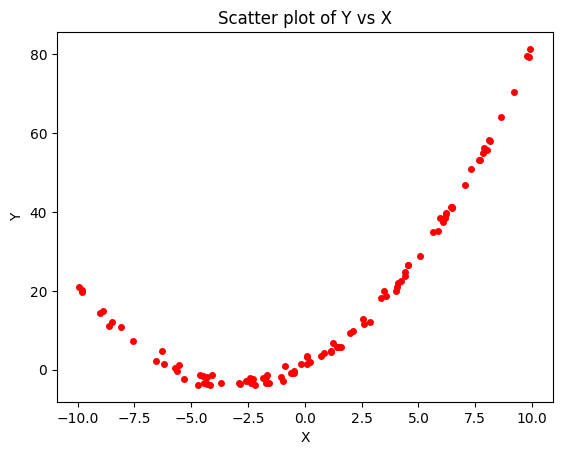

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic equation
quad = np.array([1, 3, 0.5])

# Generate 100 random X values between -10 and 10
xquad = -10.0 + 20.0 * np.random.random(100)

# Calculate Y values using the quadratic equation and add random noise
yquad = quad[0] + (quad[1] * xquad) + (quad[2] * xquad**2) + np.random.randn(100)

# Plot the data
plt.plot(xquad, yquad, 'ro', markersize=4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Y vs X')
plt.show()


e) Plot the least squares estimate line through the scatter plot.

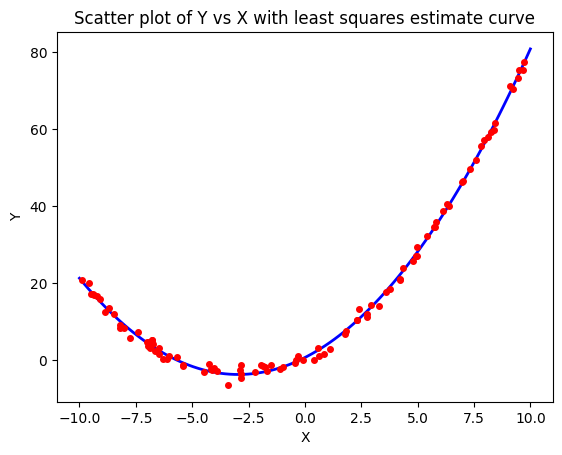

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic equation
quad = np.array([1, 3, 0.5])

# Generate 100 random X values between -10 and 10
xquad = -10.0 + 20.0 * np.random.random(100)

# Calculate Y values using the quadratic equation and add random noise
yquad = quad[0] + (quad[1] * xquad) + (quad[2] * xquad**2) + np.random.randn(100)

# Compute the least squares estimate for the quadratic curve
intercept = np.ones(np.shape(xquad)[0])
X = np.array([intercept, xquad, xquad**2]).T
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(yquad)

# Plot the data with the least squares estimate curve
xplot = np.linspace(-10, 10, 100)
yestplot = beta[0] + (beta[1] * xplot) + (beta[2] * xplot**2)
plt.plot(xplot, yestplot, 'b-', lw=2)
plt.plot(xquad, yquad, 'ro', markersize=4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Y vs X with least squares estimate curve')
plt.show()


f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimate of beta obtained from the least squares regression curve may not be exactly the same as the parameters used to generate the data. However, it should be close to the true parameters, especially as the number of data points increases.



g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

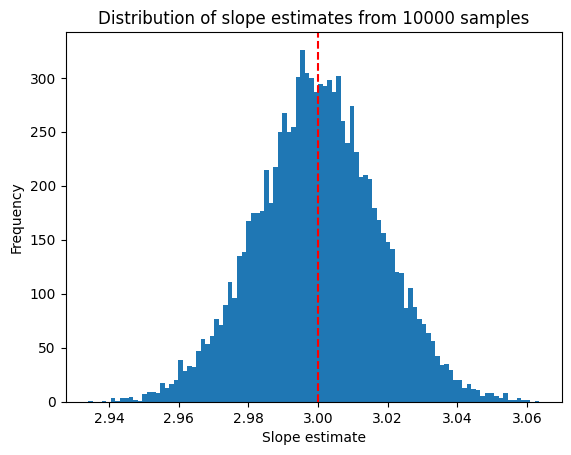

In [5]:
import numpy as np
import matplotlib.pyplot as plt

true_beta = np.array([1, 3, 0.5]) # True parameters used to generate data
betas = []

for _ in range(10000):
    # Generate 100 random X values between -10 and 10
    xquad = -10.0 + 20.0 * np.random.random(100)

    # Calculate Y values using the quadratic equation and add random noise
    yquad = true_beta[0] + (true_beta[1] * xquad) + (true_beta[2] * xquad**2) + np.random.randn(100)

    # Compute the least squares estimate for the quadratic curve
    intercept = np.ones(np.shape(xquad)[0])
    X = np.array([intercept, xquad, xquad**2]).T
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(yquad)

    # Append the slope estimate to the list of betas
    betas.append(beta[1])

# Plot the distribution of the slope estimates
plt.hist(np.array(betas), bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.xlabel('Slope estimate')
plt.ylabel('Frequency')
plt.title('Distribution of slope estimates from 10000 samples')
plt.show()
